In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from glob import glob

import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization,Conv2D,Dense,Dropout,MaxPool2D,Flatten,AveragePooling2D,GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE=[256,256]

In [3]:
train_path = 'C:\Bhupendra\Document\Data Science\Fliprobo assignment\Image scraping\Train'
test_path = 'C:\Bhupendra\Document\Data Science\Fliprobo assignment\Image scraping\Test'

In [4]:
train_files = glob(train_path + "/*/*.jpg")
test_files = glob(test_path + "/*/*.jpg")

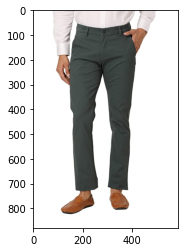

In [5]:
plt.imshow(image.load_img(np.random.choice(train_files)))

# Data Augmentations and Data Splitting

In [6]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    vertical_flip=True)

In [7]:
# train and test data generator

train_gen = gen.flow_from_directory('C:\Bhupendra\Document\Data Science\Fliprobo assignment\Image scraping\Train',target_size=IMAGE_SIZE,shuffle=True)
test_gen = gen.flow_from_directory('C:\Bhupendra\Document\Data Science\Fliprobo assignment\Image scraping\Test',target_size=IMAGE_SIZE,shuffle=True)

Found 750 images belonging to 3 classes.
Found 195 images belonging to 3 classes.


In [8]:
# the following directory gives the class indices

train_gen.class_indices

{'Jeans': 0, 'Saree': 1, 'Trousers': 2}

# Model Building

We will be performing Transfer learning as those will gives us State of the Art Results

In [9]:
# Importing the VGG 16 Model and its preprocessed Inputs

from tensorflow.keras.applications import VGG16 as Pretrained_Model
from tensorflow.keras.applications.vgg16 import preprocess_input

In [10]:
# setting weights

ptm = Pretrained_Model(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top =False)

In [11]:
# freezing the pretrained models
 ptm.trainable = False

In [12]:
# map the data into feature vectors
# keras image data generators return one hot codded classes

x = Flatten()(ptm.output)
prediction = Dense(3,activation='softmax')(x)

In [13]:
# create a new model instance

model = tf.keras.models.Model(inputs=ptm.input,outputs=prediction)

In [14]:
# get the summary of the model

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [15]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
# fitting the model

Early_Stopping = tf.keras.callbacks.EarlyStopping(verbose=3,patience=3)
model.fit(train_gen,epochs=12,
          validation_data=test_gen)

Epoch 1/12
24/24 [==============================] - 255s 11s/step - loss: 1.3878 - accuracy: 0.5973 - val_loss: 0.4494 - val_accuracy: 0.7897
Epoch 2/12
24/24 [==============================] - 293s 12s/step - loss: 0.4287 - accuracy: 0.8093 - val_loss: 0.4132 - val_accuracy: 0.7897
Epoch 3/12
24/24 [==============================] - 277s 12s/step - loss: 0.3175 - accuracy: 0.8493 - val_loss: 0.3326 - val_accuracy: 0.8615
Epoch 4/12
24/24 [==============================] - 255s 11s/step - loss: 0.2449 - accuracy: 0.8840 - val_loss: 0.2733 - val_accuracy: 0.8667
Epoch 5/12
24/24 [==============================] - 257s 11s/step - loss: 0.2692 - accuracy: 0.8653 - val_loss: 0.2894 - val_accuracy: 0.8718
Epoch 6/12
24/24 [==============================] - 270s 11s/step - loss: 0.2442 - accuracy: 0.8813 - val_loss: 0.5018 - val_accuracy: 0.8000
Epoch 7/12
24/24 [==============================] - 270s 11s/step - loss: 0.2178 - accuracy: 0.9067 - val_loss: 0.3128 - val_accuracy: 0.8615
Epoch 

In [17]:
# create a dataframe to show the metrics per epoch

losses = pd.DataFrame(model.history.history)
losses

loss  accuracy  val_loss  val_accuracy
0   1.387784  0.597333  0.449421      0.789744
1   0.428678  0.809333  0.413205      0.789744
2   0.317457  0.849333  0.332588      0.861538
3   0.244945  0.884000  0.273348      0.866667
4   0.269194  0.865333  0.289354      0.871795
5   0.244182  0.881333  0.501822      0.800000
6   0.217811  0.906667  0.312822      0.861538
7   0.146558  0.934667  0.300864      0.835897
8   0.141528  0.941333  0.307379      0.846154
9   0.104977  0.964000  0.281598      0.861538
10  0.133246  0.953333  0.337046      0.846154
11  0.120517  0.952000  0.248440      0.871795

No handles with labels found to put in legend.


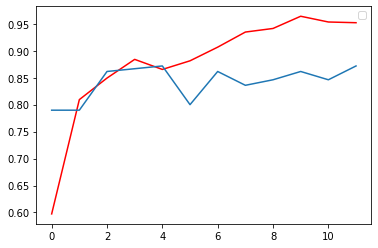

In [18]:
# plotting the accuracy of the model

plt.plot(losses['accuracy'],color='red')
plt.plot(losses['val_accuracy'])
plt.legend()

No handles with labels found to put in legend.


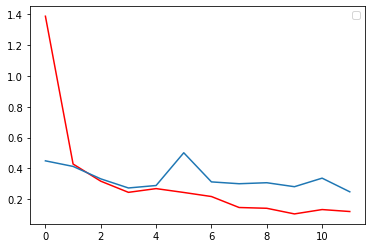

In [19]:
# plotting the lss of the model

plt.plot(losses['loss'],color='red')
plt.plot(losses['val_loss'])
plt.legend()

# Predicting on any random image

In [20]:
name_labels_df = pd.DataFrame(list(test_gen.class_indices.items()),columns = ['names','labels'],index=None)

In [21]:
name_labels_df

names  labels
0     Jeans       0
1     Saree       1
2  Trousers       2

In [22]:
#predicting any random image
import numpy as np
from keras.preprocessing import image


def predict_random_image():
    img = image.load_img(np.random.choice(test_files), target_size=IMAGE_SIZE)
    x = image.img_to_array(img)
    plt.imshow(img)
    x = np.expand_dims(x, axis=0) /255.0
    result_df = pd.DataFrame(list(model.predict(x)[0]),index=name_labels_df.names.values,columns=['result'])
    print(result_df.result.idxmax())

Saree


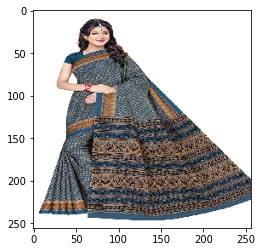

In [23]:
predict_random_image()

Jeans


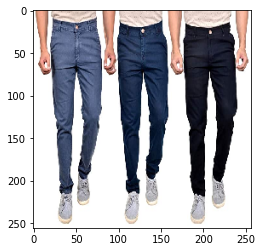

In [24]:
predict_random_image()

Saree


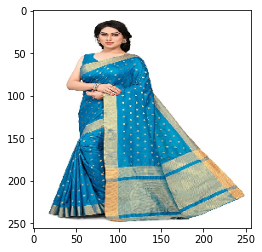

In [25]:
predict_random_image()

Trousers


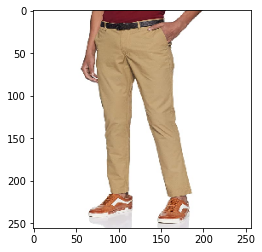

In [26]:
predict_random_image()

# Saving the model

In [27]:
# model artifact

model.save("image_classifier_model.h5")

In [28]:
# Saved model

model.save('image_classifier_model')

INFO:tensorflow:Assets written to: image_classifier_model\assets
